## I. Import Libraries and Preferences

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import os
import pickle  
import joblib

## II. Exploratory Data Analysis

In [2]:
DATASET_URL = '../datasets/monthly.csv'
data = pd.read_csv(DATASET_URL)
data.head()

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2301 non-null   object 
 1   Price   2301 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.1+ KB


In [4]:
data.describe()

,Price
count,2301.00000
mean,208.28100
std,422.63896
min,17.06000
25%,18.93000
50%,20.66000
75%,160.45000
max,2570.55000


# Data Cleaning

#### Data Preprocess

In [5]:
# Load the data
data = pd.read_csv(DATASET_URL)

# Ensure the Date column is treated as a string
data['Date'] = data['Date'].astype(str)  # Convert Date to string type

# Replace '-' with '.' and convert to float
data['Date'] = data['Date'].str.replace('-', '.').astype(float)

# Save the preprocessed data
directory = 'datasets'

if not os.path.exists(directory):
    os.makedirs(directory)

filepath = os.path.join(directory, 'preprocess.csv')

data.to_csv(filepath, index=False)

data.head()


,Date,Price
0,1833.01,18.93
1,1833.02,18.93
2,1833.03,18.93
3,1833.04,18.93
4,1833.05,18.93


# Visualization

#### Date vs Average Price of Gold per Troy Ounce in USD

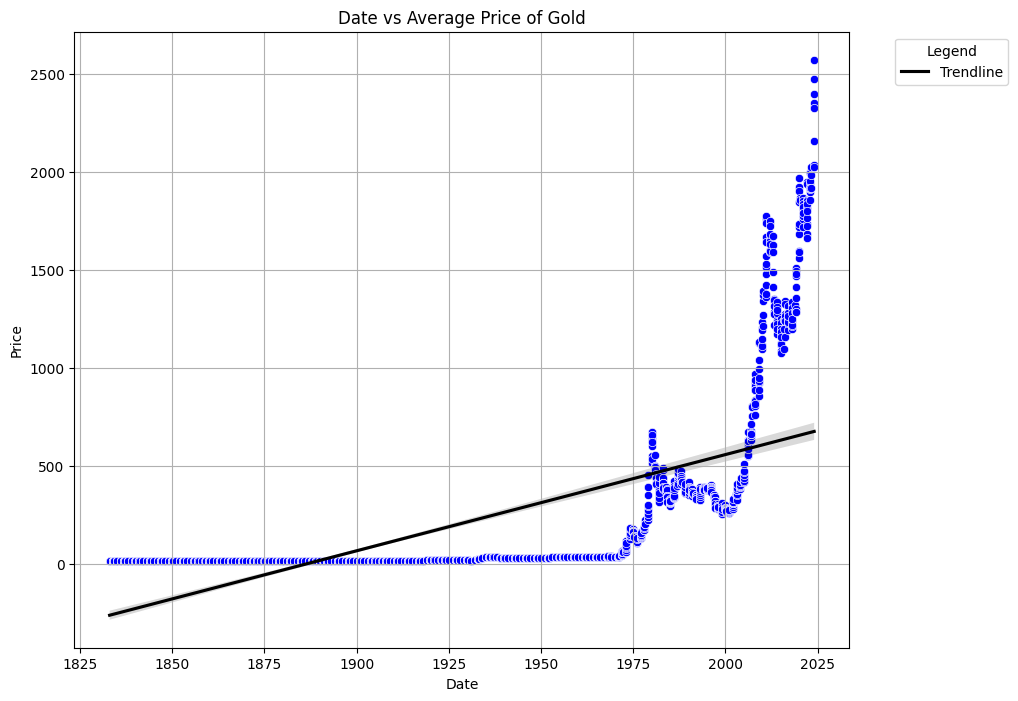

In [6]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='Date', y='Price', color='blue')
plt.title('Date vs Average Price of Gold')
plt.xlabel('Date (YYYY.MM)')
plt.ylabel('Average Price')

# Add gridlines
plt.grid(True)

# Add a trend line
sns.regplot(data=data, x='Date', y='Price', scatter=False, ax=scatter.axes, color='black', label='Trendline')

# Customize legend
handles, labels = scatter.get_legend_handles_labels()
labels.append('Trendline')
plt.legend(handles=handles, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Model Training

### XGBoost

In [7]:
PREPROCESS_URL = '../datasets/preprocess.csv'

# Load the dataset
data = pd.read_csv(PREPROCESS_URL)

# Clean column names
data.rename(columns={'Date    ': 'Date'}, inplace=True)
data.columns = data.columns.str.strip()

# Split the dataset into features and target
X = data[['Date']]  # Use 'Date' as the feature
y = data['Price']   # Use 'Price' as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Save the model as a .pkl file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Root Mean Squared Error: 27.708480598401
R-squared: 0.9949594483247642


#### Polynomial Regression

In [15]:


# Load the dataset
data = pd.read_csv(PREPROCESS_URL)

# Clean column names
data.rename(columns={'Date    ': 'Date'}, inplace=True)
data.columns = data.columns.str.strip()

# Split the dataset into features and target
X = data[['Date']]  # Use 'Date' as the feature
y = data['Price']   # Use 'Price' as the target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a polynomial regression model (try degree=2, 3, etc. for best performance)
degree = 3  # Increase this value if needed
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Save the model to a file
model_filename = "poly.pkl"
joblib.dump(model, model_filename)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Display results
print(f'Polynomial Regression Mean Absolute Error (Test): {test_mae:.2f}')
print(f'Polynomial Regression R^2 Score (Test): {test_r2:.2f}')
print(f"Model Accuracy (R² Score on Test Set): {test_r2:.2f} or {test_r2 * 100:.2f}%")


Polynomial Regression Mean Absolute Error (Test): 94.00
Polynomial Regression R^2 Score (Test): 0.87
Model Accuracy (R² Score on Test Set): 0.87 or 86.90%


#### Model 3

#### Model 4